# Customer Lifetime Value Prediction

![CLV](https://www.shutterstock.com/image-vector/clv-customer-lifetime-value-business-concept-1787382698)

Customer Lifetime Value Prediction(CLV) value refers to net profit attributed to the entire future relationship with a customer. 
A company will use different predictive analytic approaches to predict the revenue that can be generated from any customer in the future. 

Here are some benefits of using predictive CLV:
    
* __Resource Allocation__: Predictive CLV helps businesses allocate resources efficiently by identifying which customers are likely to be the most profitable. Companies can focus their marketing, sales, and customer service efforts on high-CLV customers.

    
* __Customer Segmentation__: Predictive CLV enables businesses to segment customers based on their potential value. This allows companies to tailor marketing strategies, products, and services to different customer segments, leading to more personalized and effective interactions.

    
* __Retention Strategies__: By identifying high-value customers, businesses can develop targeted retention strategies to keep these customers engaged and loyal. Retaining high-value customers is often more cost-effective than acquiring new ones.

    
* __Marketing ROI__: Predictive CLV helps businesses measure the return on investment (ROI) of their marketing efforts more accurately. Companies can assess which marketing channels and campaigns bring in the most high-CLV customers and adjust their strategies accordingly.


* __Customer Experience__: Knowing a customer's potential lifetime value can help businesses prioritize improving the customer experience for high-value customers. This can include offering personalized services, exclusive deals, and better support.

    
* __Product Development__: Businesses can use predictive CLV to understand which products or services are most appealing to high-value customers. This insight can guide product development and innovation efforts.

    
* __Cross-Selling and Upselling__: Predictive CLV can help businesses identify opportunities for cross-selling and upselling to existing customers. High-CLV customers may be more receptive to additional products and services.

    
* __Long-Term Planning__: Predictive CLV provides insight into future revenue streams and customer trends, allowing businesses to make more informed decisions about long-term strategy and planning.
 



On this notebook, we will compare different __Machine Learning__ approaches to predict CLV using a customer level data based on car insurance


* __Linear Regression__
    
* __LASSO Regression__
    
* __Ridge Regression__
    
* __Bayesian Regression__
    
* __Light GBM__



__Data__: from Kaggle [Kaggle dataset](https://www.kaggle.com/saniyajaswani/credit-card-data). 

## Import the important packages

In [109]:
import pandas as pd
import numpy as np 

import matplotlib.pyplot as plt 
import seaborn as sns 

import sklearn.metrics as sklm 
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import Lasso, LinearRegression, Ridge, BayesianRidge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

from lightgbm import LGBMRegressor

import math


## Load and do EDA (Exploratory Data Analysis)
The data is all in one csv file. In this next step I will first load the data to see how this looks like

In [45]:
data = pd.read_csv('Fn-UseC_-Marketing-Customer-Value-Analysis.csv')
data.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [46]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

It seems that there is a lot of text / category information (these are of the Dtype 'object') and a few numerical columns (Dtypes 'int64' and 'float64'). 

The column 'Customer Lifetime Value' is the column I want to predict. 

In [47]:
data.shape

(9134, 24)

The dataset consists of 9134 rows and 24 columns. 

In [48]:
data.describe()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,8004.940475,37657.380009,93.219291,15.097000,48.064594,0.384388,2.966170,434.088794
std,6870.967608,30379.904734,34.407967,10.073257,27.905991,0.910384,2.390182,290.500092
min,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007
25%,3994.251794,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,272.258244
50%,5780.182197,33889.500000,83.000000,14.000000,48.000000,0.000000,2.000000,383.945434
75%,8962.167041,62320.000000,109.000000,23.000000,71.000000,0.000000,4.000000,547.514839
max,83325.381190,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678


There are some strange outliers for the CLV and claim amounts. I will look and handle these later on. 

In [49]:
data.describe(include='O')

,Customer,State,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Location Code,Marital Status,Policy Type,Policy,Renew Offer Type,Sales Channel,Vehicle Class,Vehicle Size
count,9134,9134,9134,9134,9134,9134,9134,9134,9134,9134,9134,9134,9134,9134,9134,9134
unique,9134,5,2,3,5,59,5,2,3,3,3,9,4,4,6,3
top,BU79786,California,No,Basic,Bachelor,1/10/11,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Four-Door Car,Medsize
freq,1,3150,7826,5568,2748,195,5698,4658,5779,5298,6788,3426,3752,3477,4621,6424


In [50]:
#Let's see what the options are in the text columns with two or three options (the objects)

print('Response: '+ str(data['Response'].unique()))
print('Coverage: '+ str(data['Coverage'].unique()))
print('Education: '+ str(data['Education'].unique()))
print('Employment Status: '+ str(data['EmploymentStatus'].unique()))
print('Gender: ' + str(data['Gender'].unique()))
print('Location Code: ' + str(data['Location Code'].unique()))
print('Married: ' + str(data['Marital Status'].unique()))
print('Policy Type: ' + str(data['Policy Type'].unique()))
print('Vehicle Size: ' + str(data['Vehicle Size'].unique()))

Response: ['No' 'Yes']
Coverage: ['Basic' 'Extended' 'Premium']
Education: ['Bachelor' 'College' 'Master' 'High School or Below' 'Doctor']
Employment Status: ['Employed' 'Unemployed' 'Medical Leave' 'Disabled' 'Retired']
Gender: ['F' 'M']
Location Code: ['Suburban' 'Rural' 'Urban']
Married: ['Married' 'Single' 'Divorced']
Policy Type: ['Corporate Auto' 'Personal Auto' 'Special Auto']
Vehicle Size: ['Medsize' 'Small' 'Large']


## Customer Lifetime Value 

As Customer Lifetime Value is the column I want to predict, let's explore this column in the training dataset.


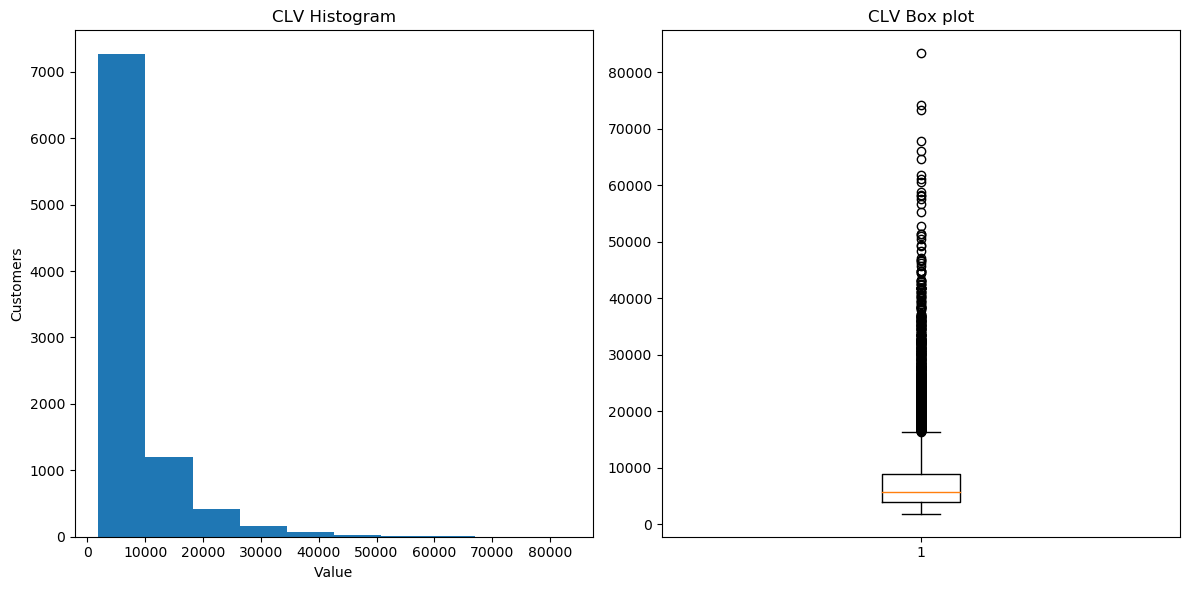

In [51]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

axs[0].hist(data['Customer Lifetime Value'], bins = 10)
axs[0].set_title("CLV Histogram") 
axs[0].set_xlabel("Value") 
axs[0].set_ylabel("Customers") 

axs[1].boxplot(data['Customer Lifetime Value'])
axs[1].set_title("CLV Box plot") 
plt.tight_layout()
plt.show()

In [52]:
# let's look closer to these outliers over 50000
outliers = data[data['Customer Lifetime Value'] > 50000]
outliers.head(25)

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
79,OM82309,California,58166.55351,No,Basic,Bachelor,2/27/11,Employed,M,61321,...,30,1,2,Personal Auto,Personal L3,Offer2,Branch,427.631210,Luxury Car,Small
1974,YC54142,Washington,74228.51604,No,Extended,High School or Below,1/26/11,Unemployed,M,0,...,34,0,2,Personal Auto,Personal L1,Offer1,Branch,1742.400000,Luxury Car,Medsize
2190,KI58952,California,51337.90677,No,Premium,College,2/24/11,Employed,F,72794,...,47,1,2,Personal Auto,Personal L2,Offer1,Web,50.454459,SUV,Large
2908,EN65835,Arizona,58753.88046,No,Premium,Bachelor,1/6/11,Employed,F,24964,...,84,0,2,Personal Auto,Personal L2,Offer2,Agent,888.000000,SUV,Medsize
3145,CL79250,Nevada,52811.49112,No,Basic,Bachelor,1/8/11,Unemployed,M,0,...,70,0,2,Corporate Auto,Corporate L2,Offer2,Agent,873.600000,Luxury Car,Small
3760,AZ84403,Oregon,61850.18803,No,Extended,College,2/4/11,Unemployed,F,0,...,29,0,2,Personal Auto,Personal L1,Offer3,Branch,1142.400000,Luxury SUV,Medsize
4126,JT47995,Arizona,60556.19213,No,Extended,College,1/1/11,Unemployed,F,0,...,45,0,2,Personal Auto,Personal L3,Offer1,Web,979.200000,Luxury SUV,Large
4915,DU50092,Oregon,56675.93768,No,Premium,College,1/24/11,Employed,F,77237,...,93,0,2,Personal Auto,Personal L1,Offer4,Web,1358.400000,Luxury SUV,Medsize
5279,SK66747,Washington,66025.75407,No,Basic,Bachelor,2/22/11,Employed,M,33481,...,46,0,2,Personal Auto,Personal L3,Offer1,Agent,1194.892002,Luxury SUV,Medsize
5716,FQ61281,Oregon,83325.38119,No,Extended,High School or Below,1/31/11,Employed,M,58958,...,74,0,2,Personal Auto,Personal L3,Offer1,Call Center,1108.800000,Luxury Car,Small


In [39]:
outliers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20 entries, 79 to 8825
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       20 non-null     object 
 1   State                          20 non-null     object 
 2   Customer Lifetime Value        20 non-null     float64
 3   Response                       20 non-null     object 
 4   Coverage                       20 non-null     object 
 5   Education                      20 non-null     object 
 6   Effective To Date              20 non-null     object 
 7   EmploymentStatus               20 non-null     object 
 8   Gender                         20 non-null     object 
 9   Income                         20 non-null     int64  
 10  Location Code                  20 non-null     object 
 11  Marital Status                 20 non-null     object 
 12  Monthly Premium Auto           20 non-null     in

Looks like there are only 20 rows of the 9134 rows that have a lifetime value of more than 50000. 


### Handling missing values
Let's continue with handling the missing values in this dataset. 
Let's see where and how many missing values there are in this dataset.  

In [12]:
# let's look in what columns there are missing values 
data.isnull().sum().sort_values(ascending = False)

Vehicle Size                     0
Vehicle Class                    0
State                            0
Customer Lifetime Value          0
Response                         0
Coverage                         0
Education                        0
Effective To Date                0
EmploymentStatus                 0
Gender                           0
Income                           0
Location Code                    0
Marital Status                   0
Monthly Premium Auto             0
Months Since Last Claim          0
Months Since Policy Inception    0
Number of Open Complaints        0
Number of Policies               0
Policy Type                      0
Policy                           0
Renew Offer Type                 0
Sales Channel                    0
Total Claim Amount               0
Customer                         0
dtype: int64

There seem to be no missing values in this dataset. 

### Making the text columns Numeric

In [53]:
#First we drop the customer column, as this is a unique identifier and will bias the model
data = data.drop(labels = ['Customer'], axis = 1)

In [54]:
# let's load the required packages

#from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [55]:
# Let's transform the categorical variables to continous variables
column_names = ['Response', 'Coverage', 'Education', 
                     'Effective To Date', 'EmploymentStatus', 
                     'Gender', 'Location Code', 'Marital Status',
                     'Policy Type', 'Policy', 'Renew Offer Type',
                     'Sales Channel', 'Vehicle Class', 'Vehicle Size', 'State']

for col in column_names:
    data[col] = le.fit_transform(data[col])
    
data.head()

,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,4,2763.519279,0,0,0,47,1,0,56274,1,...,5,0,1,0,2,0,0,384.811147,5,1
1,0,6979.535903,0,1,0,24,4,0,0,1,...,42,0,8,1,5,2,0,1131.464935,0,1
2,2,12887.431650,0,2,0,41,1,0,48767,1,...,38,0,2,1,5,0,0,566.472247,5,1
3,1,7645.861827,0,0,0,12,4,1,0,1,...,65,0,7,0,1,0,2,529.881344,3,1
4,4,2813.692575,0,0,0,52,1,1,43836,0,...,44,0,1,1,3,0,0,138.130879,0,1


In [58]:
data.dtypes

State                              int32
Customer Lifetime Value          float64
Response                           int32
Coverage                           int32
Education                          int32
Effective To Date                  int32
EmploymentStatus                   int32
Gender                             int32
Income                             int64
Location Code                      int32
Marital Status                     int32
Monthly Premium Auto               int64
Months Since Last Claim            int64
Months Since Policy Inception      int64
Number of Open Complaints          int64
Number of Policies                 int64
Policy Type                        int32
Policy                             int32
Renew Offer Type                   int32
Sales Channel                      int32
Total Claim Amount               float64
Vehicle Class                      int32
Vehicle Size                       int32
dtype: object

As my model can not handle floats, we will change these to integers.

In [59]:
data['Customer Lifetime Value'] = data['Customer Lifetime Value'].astype(int)
data['Total Claim Amount'] = data['Total Claim Amount'].astype(int)

### Checking the remaining features

In [61]:
## First I need to split the dataset in the y-column (the target) and the components (X), the independent columns. 

y = data['Customer Lifetime Value']                             # target - the column we want to predict 
X = data.drop(labels = ['Customer Lifetime Value'], axis = 1)   # independent columns  

### Check the main variables for CLV

In [63]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k='all')
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

# concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Name of the column','Score']  # naming the dataframe columns
print(featureScores.nlargest(10,'Score'))               # print 10 best features

               Name of the column         Score
7                          Income  1.662835e+08
19             Total Claim Amount  1.435183e+06
12  Months Since Policy Inception  1.070413e+05
10           Monthly Premium Auto  1.033649e+05
4               Effective To Date  6.657783e+04
11        Months Since Last Claim  4.500123e+04
20                  Vehicle Class  1.496298e+04
14             Number of Policies  1.457392e+04
13      Number of Open Complaints  1.456721e+04
3                       Education  8.184874e+03


### Get correlations for each feature

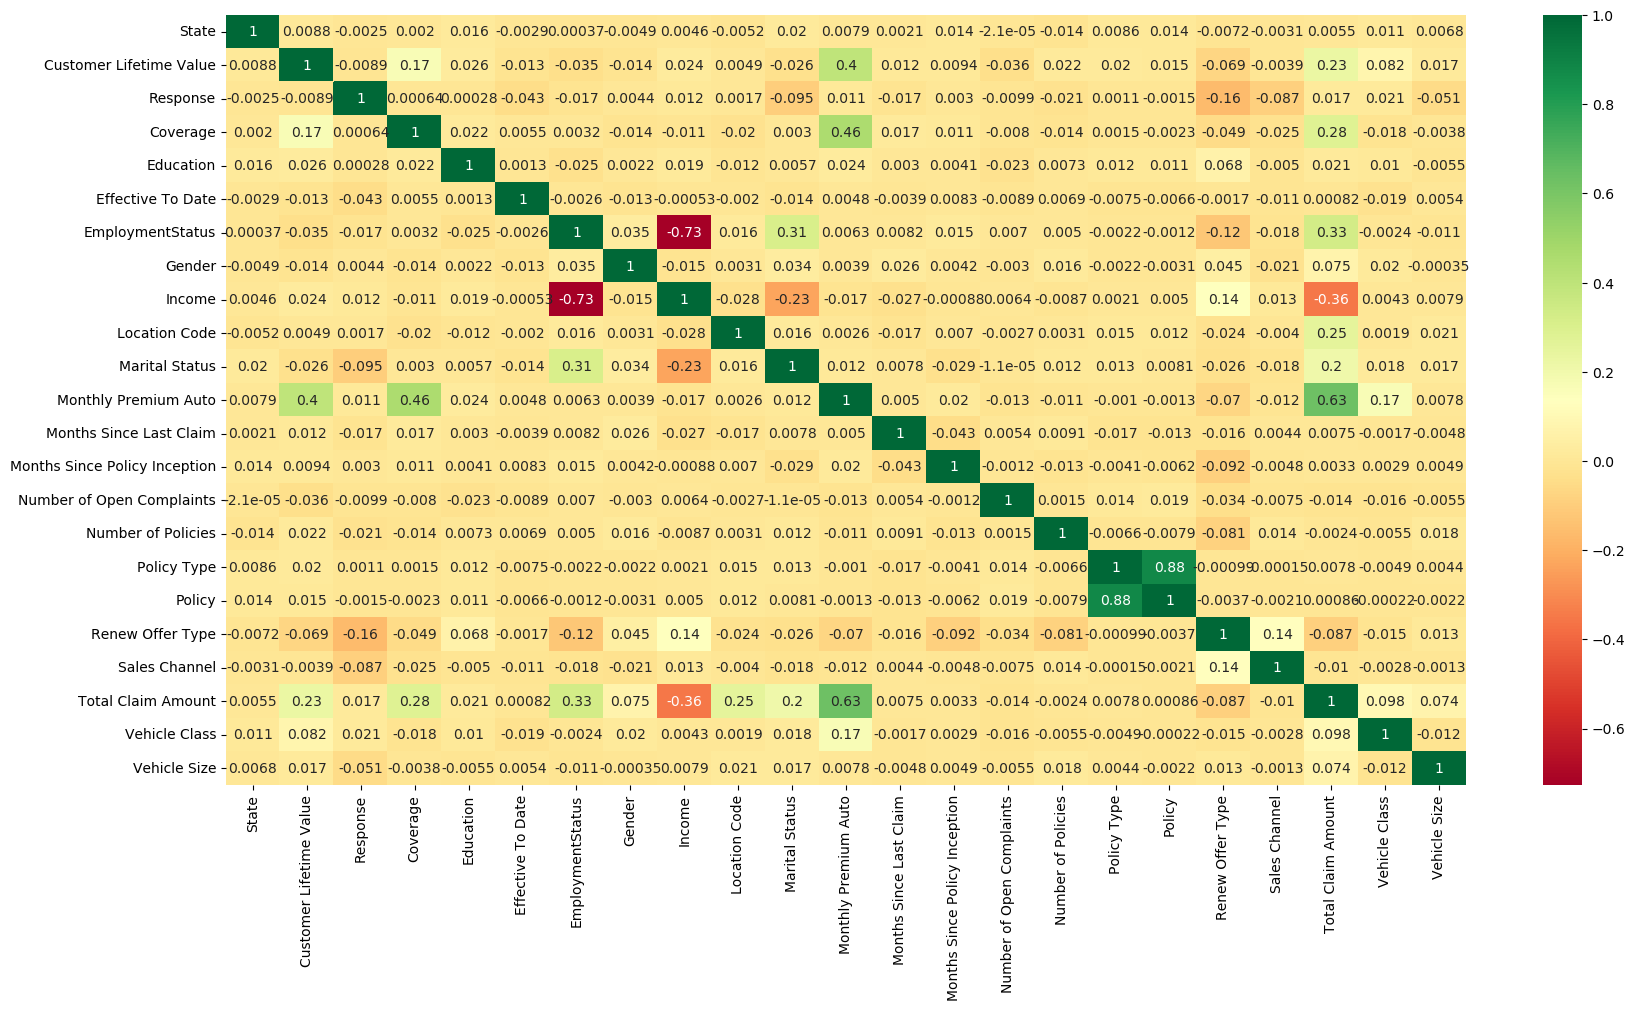

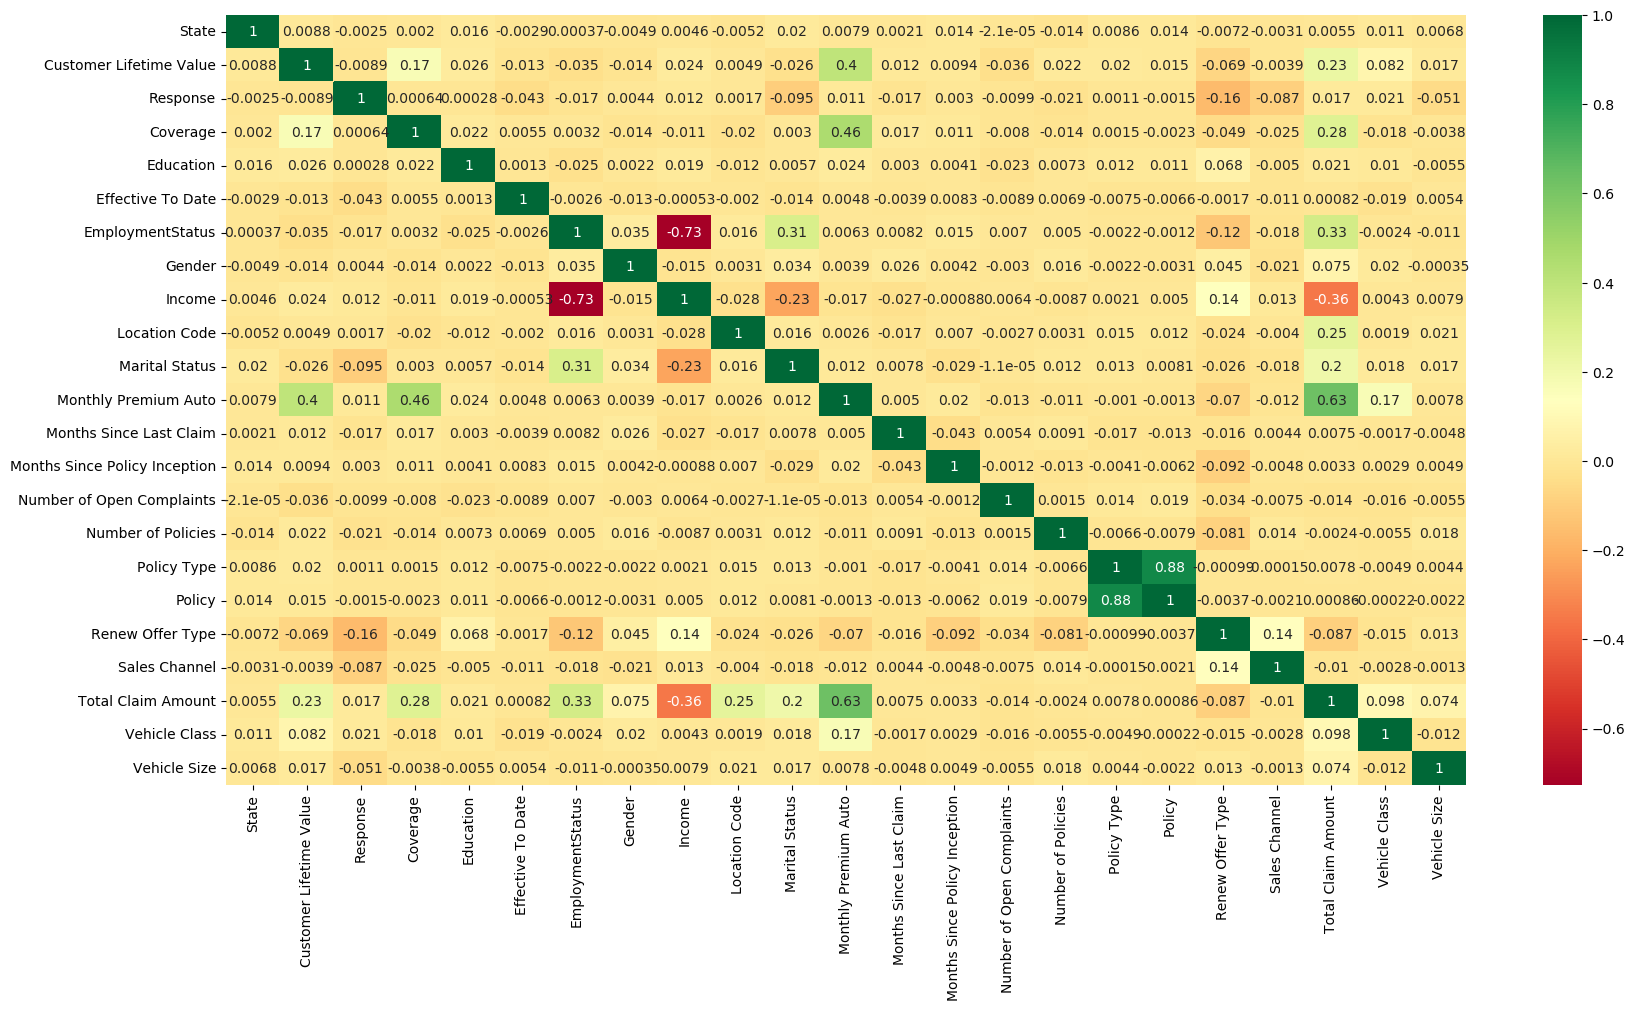

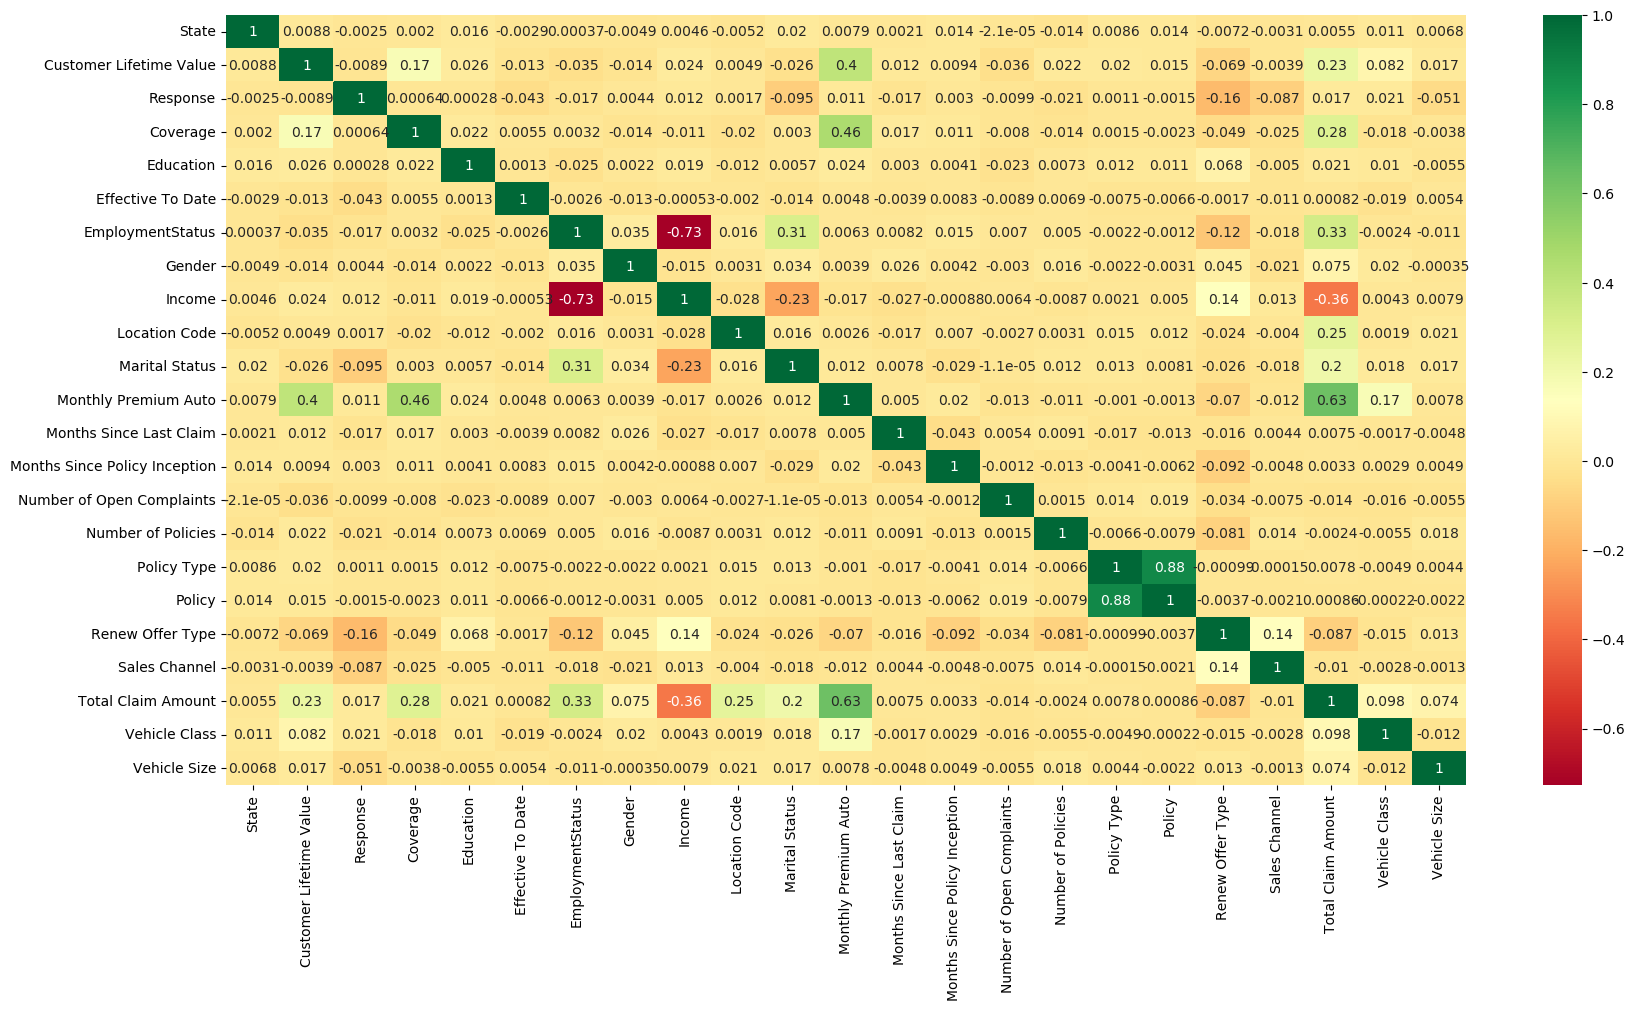

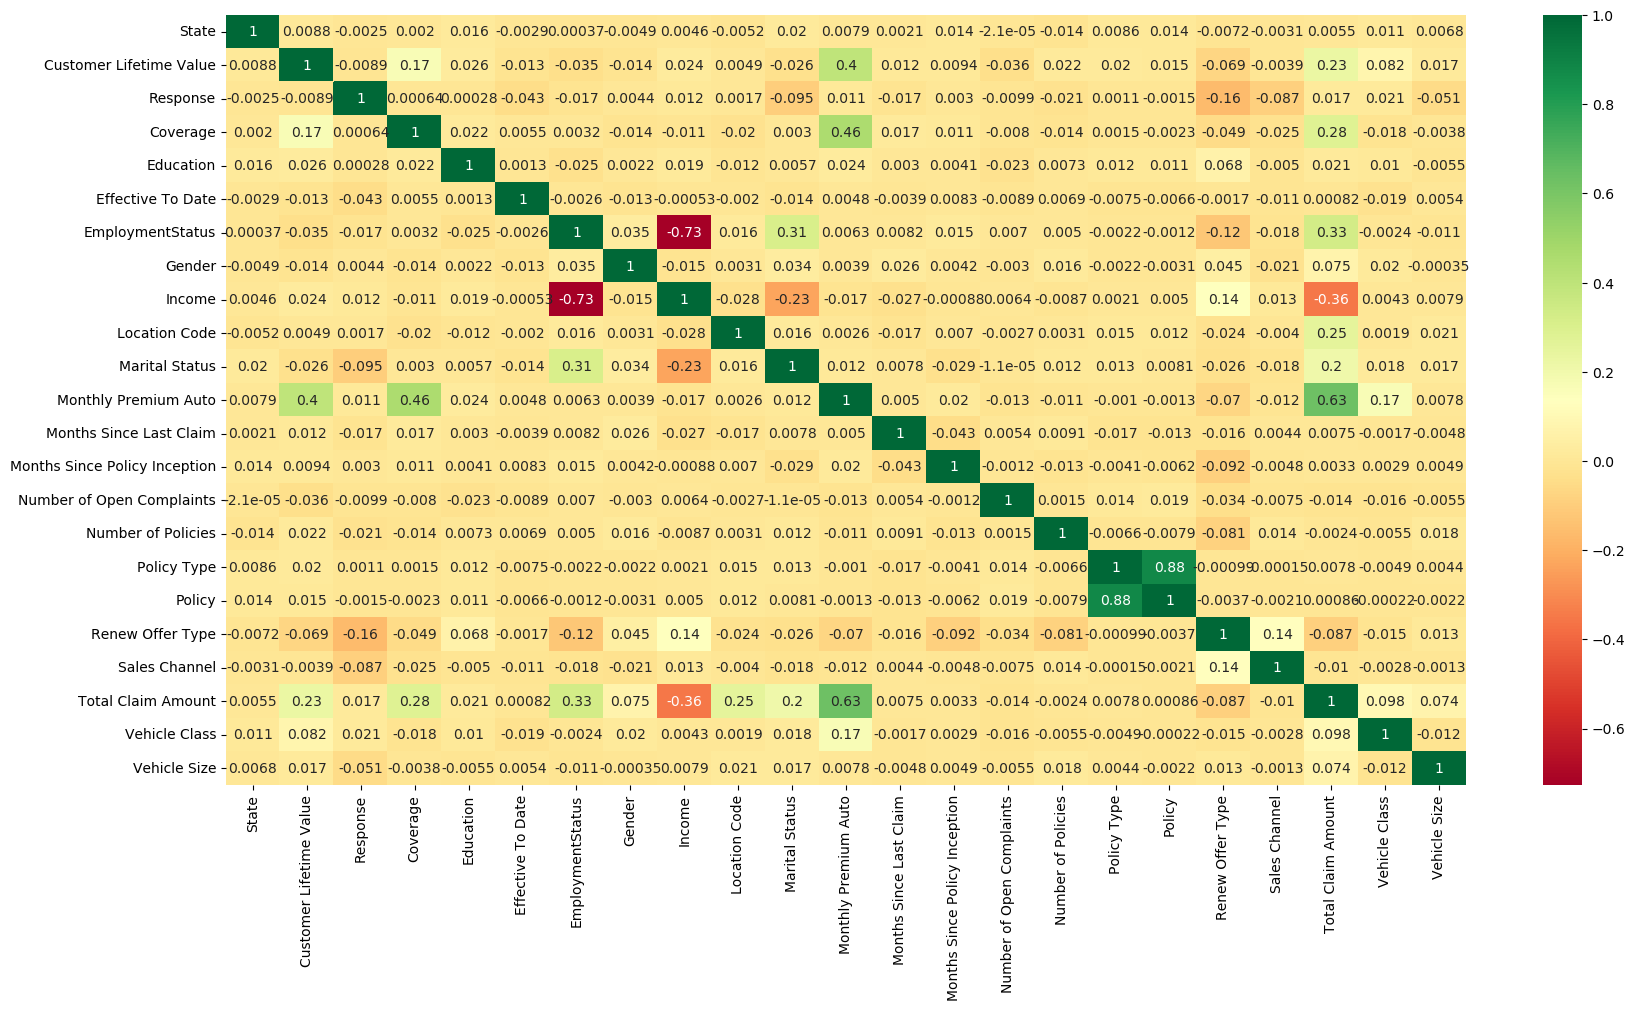

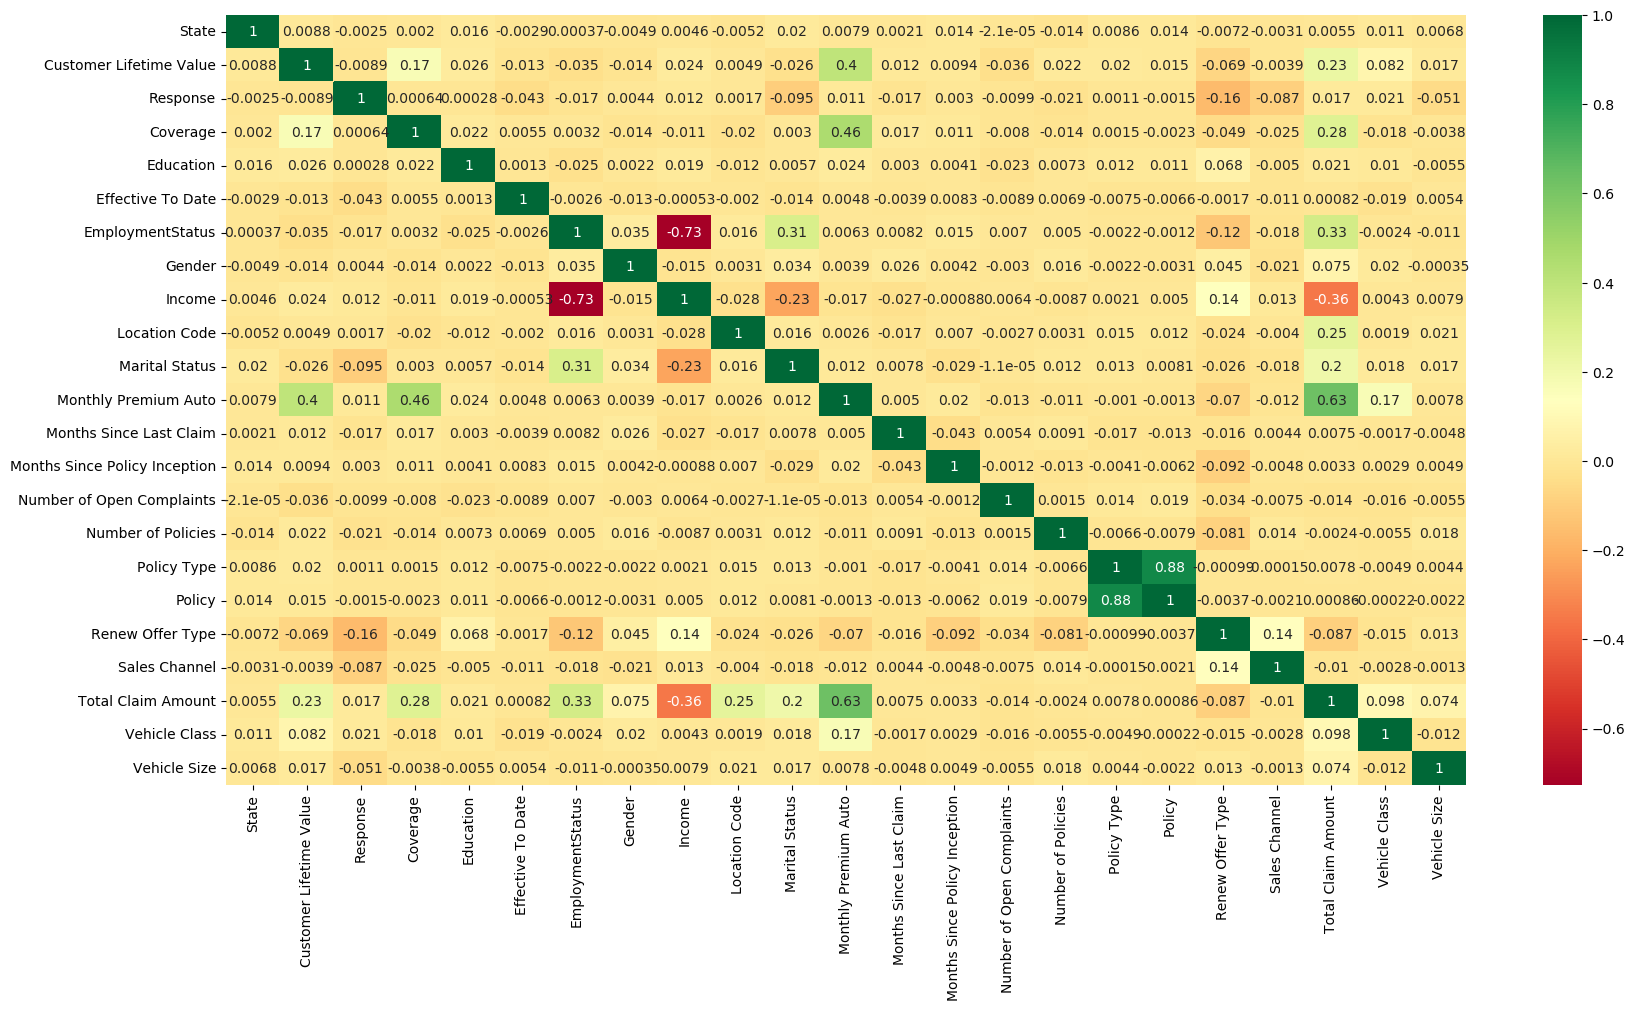

In [70]:
corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,10))

# plot heat map
g= sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")
plt.show()

In [73]:
corr_matrix = data.corr()

# Extract correlations with 'Customer Lifetime Value' and sort them in descending order
sorted_corr = corr_matrix['Customer Lifetime Value'].sort_values(ascending=False)
print(sorted_corr)

Customer Lifetime Value          1.000000
Monthly Premium Auto             0.396262
Total Claim Amount               0.226454
Coverage                         0.168041
Vehicle Class                    0.082306
Education                        0.026038
Income                           0.024365
Number of Policies               0.021956
Policy Type                      0.020010
Vehicle Size                     0.017098
Policy                           0.015216
Months Since Last Claim          0.011516
Months Since Policy Inception    0.009419
State                            0.008777
Location Code                    0.004853
Sales Channel                   -0.003941
Response                        -0.008930
Effective To Date               -0.012978
Gender                          -0.013610
Marital Status                  -0.026003
EmploymentStatus                -0.034845
Number of Open Complaints       -0.036342
Renew Offer Type                -0.068548
Name: Customer Lifetime Value, dty

What pop's out when looking at the correlations for the CLV is the column 'Monthly Premium Auto' and the 'Total Claim Amount'
These might be the best features to use.

# Machine learning Approaches

I want to predict a continous number, therefore I will test different approaches:
    
__1 - Linear Regression__
    
__2 - LASSO Regression__

__3 - Ridge Regression__
    
__4 - Bayesian Regression__
    
__5 - Light GBM__

## Let's start by 1 - Linear Regression

Split the dataset in train and test.


In [96]:
### Using only top 5 vars

In [79]:
from sklearn.model_selection import train_test_split

#First try with the 5 most important features
X_5 = data[['Total Claim Amount', 'Monthly Premium Auto', 'Income', 'Coverage', 'Months Since Policy Inception']] #independent columns chosen 
y = data['Customer Lifetime Value']    #target column 

# I want to withhold 30 % of the trainset to perform the tests
X_train, X_test, y_train, y_test= train_test_split(X_5,y, test_size=0.3 , random_state = 25)

In [80]:
print('Shape of X_train is: ', X_train.shape)
print('Shape of X_test is: ', X_test.shape)
print('Shape of Y_train is: ', y_train.shape)
print('Shape of y_test is: ', y_test.shape)

Shape of X_train is:  (6393, 5)
Shape of X_test is:  (2741, 5)
Shape of Y_train is:  (6393,)
Shape of y_test is:  (2741,)


In [81]:
# build a check:

def print_metrics(y_true, y_predicted, n_parameters):
    ## First compute R^2 and the adjusted R^2
    r2 = sklm.r2_score(y_true, y_predicted)
    r2_adj = r2 - (n_parameters - 1)/(y_true.shape[0] - n_parameters) * (1 - r2)
    
    ## Print the usual metrics and the R^2 values
    print('Mean Square Error      = ' + str(sklm.mean_squared_error(y_true, y_predicted)))
    print('Root Mean Square Error = ' + str(math.sqrt(sklm.mean_squared_error(y_true, y_predicted))))
    print('Mean Absolute Error    = ' + str(sklm.mean_absolute_error(y_true, y_predicted)))
    print('Median Absolute Error  = ' + str(sklm.median_absolute_error(y_true, y_predicted)))
    print('R^2                    = ' + str(r2))
    print('Adjusted R^2           = ' + str(r2_adj))
   


In [82]:
# Linear regression model
model_5 = LinearRegression() 
model_5.fit(X_train, y_train)

LinearRegression()

In [83]:
Predictions = model_5.predict(X_test)
print_metrics(y_test, Predictions, 5)

Mean Square Error      = 37794394.74613515
Root Mean Square Error = 6147.7145953707995
Mean Absolute Error    = 3819.454097147807
Median Absolute Error  = 2993.0870104703736
R^2                    = 0.14361635740314171
Adjusted R^2           = 0.14236433453384806


### Linear Regression on all
Let's try the model on all features to see if this improves

In [84]:
#I want to withhold 30 % of the trainset to perform the tests
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=0.3 , random_state = 25)

print('Shape of X_train is: ', X_train.shape)
print('Shape of X_test is: ', X_test.shape)
print('Shape of Y_train is: ', y_train.shape)
print('Shape of y_test is: ', y_test.shape)

Shape of X_train is:  (6393, 22)
Shape of X_test is:  (2741, 22)
Shape of Y_train is:  (6393,)
Shape of y_test is:  (2741,)


In [85]:
# Linear regression model
model = LinearRegression() 
model.fit(X_train, y_train)

LinearRegression()

In [86]:
Predictions = model.predict(X_test)
print_metrics(y_test, Predictions, 22)

Mean Square Error      = 37755402.334013365
Root Mean Square Error = 6144.542483701563
Mean Absolute Error    = 3829.8152967577053
Median Absolute Error  = 2641.7822096964774
R^2                    = 0.14449988693578253
Adjusted R^2           = 0.13789249363885403


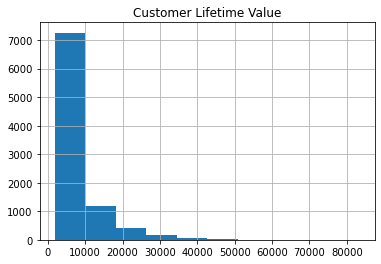

In [30]:
#to see the CLV data as is (without having the extremes removed)
data.hist('Customer Lifetime Value', bins = 10)
plt.show()

### Remove long tail (CLV > 40K)

In [95]:
f = data[(data['Customer Lifetime Value']<=40000)]

X_5 = f[['Total Claim Amount', 'Monthly Premium Auto', 'Income', 'Coverage', 'Months Since Policy Inception']] #independent columns chosen 
y = f['Customer Lifetime Value']    #target column 

# I want to withhold 30 % of the trainset to perform the tests
X_train, X_test, y_train, y_test= train_test_split(X_5,y, test_size=0.3 , random_state = 25)

model_5 = LinearRegression() 
model_5.fit(X_train, y_train)

Predictions = model_5.predict(X_test)
print_metrics(y_test, Predictions, 5)

Mean Square Error      = 32825711.39861825
Root Mean Square Error = 5729.372688053924
Mean Absolute Error    = 3665.3218249106426
Median Absolute Error  = 3304.8112360234227
R^2                    = 0.14101069539036104
Adjusted R^2           = 0.13974654630337113


#### Conclusion of 1 - Linear Regression:

Model performs slightly better using only top 5 vars instead of all variables.
However, the overall performance is still very low.
There are no improvements on performance when try to remove long tail





## 2 - LASSO Regression

In [98]:
X_train, X_test, y_train, y_test = train_test_split(data.drop('Customer Lifetime Value', axis=1), data['Customer Lifetime Value'], test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the LASSO regression model
lasso = Lasso(random_state=42)

# Define the hyperparameter grid for alpha
param_grid = {
    'alpha': np.logspace(-4, 0, 20)  # Alpha values between 10^(-4) and 10^0
}

# Create GridSearchCV object
grid_search = GridSearchCV(lasso, param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit the grid search to the training data
grid_search.fit(X_train_scaled, y_train)

# Print the best alpha value found
print(f'Best alpha value: {grid_search.best_params_["alpha"]}')

# Predict on the test set with the best model
y_pred = grid_search.best_estimator_.predict(X_test_scaled)

Best alpha value: 1.0


In [102]:
# Calculate adjusted R-squared
n = len(y_test)
p = X_test.shape[1]
adjusted_r2 = 1 - ((1 - r2) * (n - 1) / (n - p - 1))

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)

# Print the metrics
print(f'Mean Squared Error: {mse:.4f}')
print(f'R-squared: {r2:.4f}')
print(f'Adjusted R-squared: {adjusted_r2:.4f}')

# Display the coefficients of the best model
print('Coefficients:')
for feature, coef in zip(data.columns[:-1], grid_search.best_estimator_.coef_):
    print(f'{feature}: {coef:.4f}')

# Display the intercept of the best model
print(f'Intercept: {grid_search.best_estimator_.intercept_:.4f}')

Mean Squared Error: 43515291.7722
R-squared: 0.1556
Adjusted R-squared: 0.1453
Coefficients:
State: -35.7235
Customer Lifetime Value: -146.3804
Response: -111.2866
Coverage: 200.2111
Education: -109.3648
Effective To Date: -108.9357
EmploymentStatus: -35.0361
Gender: 83.4905
Income: 24.1438
Location Code: -155.5686
Marital Status: 2777.7726
Monthly Premium Auto: 62.3620
Months Since Last Claim: 20.2981
Months Since Policy Inception: -236.9383
Number of Open Complaints: 138.7403
Number of Policies: 109.6600
Policy Type: -7.8894
Policy: -362.4940
Renew Offer Type: 80.7672
Sales Channel: -99.2886
Total Claim Amount: 93.4249
Vehicle Class: 98.1034
Intercept: 8022.2860


__Conclusion of 2 - LASSO Regression:__
    
Model performs slightly better when using LASSO regression. However, this type of regression is computational more expensive than linear regression given the parameters grid search.

## 3 - Ridge Regression

In [104]:
X_train, X_test, y_train, y_test = train_test_split(data.drop('Customer Lifetime Value', axis=1), data['Customer Lifetime Value'], test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the Ridge regression model
ridge = Ridge(random_state=42)

# Define the hyperparameter grid for alpha
param_grid = {
    'alpha': np.logspace(-4, 2, 20)  # Alpha values between 10^(-4) and 10^2
}

# Create GridSearchCV object
grid_search = GridSearchCV(ridge, param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit the grid search to the training data
grid_search.fit(X_train_scaled, y_train)

# Print the best alpha value found
print(f'Best alpha value: {grid_search.best_params_["alpha"]}')

# Predict on the test set with the best model
y_pred = grid_search.best_estimator_.predict(X_test_scaled)

# Calculate R-squared
r2 = r2_score(y_test, y_pred)

# Calculate adjusted R-squared
n = len(y_test)
p = X_test.shape[1]
adjusted_r2 = 1 - ((1 - r2) * (n - 1) / (n - p - 1))

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)

# Print the metrics
print(f'Mean Squared Error: {mse:.4f}')
print(f'R-squared: {r2:.4f}')
print(f'Adjusted R-squared: {adjusted_r2:.4f}')

# Display the coefficients of the best model
print('Coefficients:')
for feature, coef in zip(data.columns[:-1], grid_search.best_estimator_.coef_):
    print(f'{feature}: {coef:.4f}')

# Display the intercept of the best model
print(f'Intercept: {grid_search.best_estimator_.intercept_:.4f}')

Best alpha value: 100.0
Mean Squared Error: 43547529.3083
R-squared: 0.1550
Adjusted R-squared: 0.1447
Coefficients:
State: -35.8442
Customer Lifetime Value: -146.3286
Response: -89.3836
Coverage: 198.5174
Education: -108.7719
Effective To Date: -116.2151
EmploymentStatus: -38.4155
Gender: 94.7885
Income: 12.1088
Location Code: -159.6000
Marital Status: 2695.5019
Monthly Premium Auto: 62.5149
Months Since Last Claim: 23.0229
Months Since Policy Inception: -234.6288
Number of Open Complaints: 137.9362
Number of Policies: 110.0387
Policy Type: -9.4757
Policy: -360.5757
Renew Offer Type: 80.6707
Sales Channel: -43.1391
Total Claim Amount: 101.7013
Vehicle Class: 95.1484
Intercept: 8022.2860


__Conclusion of 3 - Ridge Regression:__

Similar performance as LASSO regression

## 4 - Bayesian Regression

In [106]:
X_train, X_test, y_train, y_test = train_test_split(data.drop('Customer Lifetime Value', axis=1), data['Customer Lifetime Value'], test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the BayesianRidge model
bayesian_ridge = BayesianRidge()

# Define the hyperparameter grid
param_grid = {
    'alpha_1': [1e-6, 1e-5, 1e-4, 1e-3],
    'alpha_2': [1e-6, 1e-5, 1e-4, 1e-3],
    'lambda_1': [1e-6, 1e-5, 1e-4, 1e-3],
    'lambda_2': [1e-6, 1e-5, 1e-4, 1e-3],
}

# Create GridSearchCV object
grid_search = GridSearchCV(bayesian_ridge, param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit the grid search to the training data
grid_search.fit(X_train_scaled, y_train)

# Print the best hyperparameters found
print(f'Best hyperparameters found: {grid_search.best_params_}')

# Predict on the test set with the best model
y_pred = grid_search.best_estimator_.predict(X_test_scaled)

# Calculate R-squared
r2 = r2_score(y_test, y_pred)

# Calculate adjusted R-squared
n = len(y_test)
p = X_test.shape[1]
adjusted_r2 = 1 - ((1 - r2) * (n - 1) / (n - p - 1))

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)

# Print the metrics
print(f'Mean Squared Error: {mse:.4f}')
print(f'R-squared: {r2:.4f}')
print(f'Adjusted R-squared: {adjusted_r2:.4f}')

# Display the coefficients of the best model
print('Coefficients:')
for feature, coef in zip(data.columns[:-1], grid_search.best_estimator_.coef_):
    print(f'{feature}: {coef:.4f}')

# Display the intercept of the best model
print(f'Intercept: {grid_search.best_estimator_.intercept_:.4f}')

Best hyperparameters found: {'alpha_1': 0.001, 'alpha_2': 1e-06, 'lambda_1': 1e-06, 'lambda_2': 0.001}
Mean Squared Error: 43550644.5602
R-squared: 0.1549
Adjusted R-squared: 0.1446
Coefficients:
State: -35.7664
Customer Lifetime Value: -146.2135
Response: -87.3819
Coverage: 198.2782
Education: -108.6290
Effective To Date: -116.8452
EmploymentStatus: -38.6239
Gender: 95.6851
Income: 10.9865
Location Code: -159.8676
Marital Status: 2688.2437
Monthly Premium Auto: 62.4336
Months Since Last Claim: 23.1771
Months Since Policy Inception: -234.3379
Number of Open Complaints: 137.7959
Number of Policies: 109.4019
Policy Type: -8.9496
Policy: -360.2794
Renew Offer Type: 80.5771
Sales Channel: -38.2042
Total Claim Amount: 102.3326
Vehicle Class: 94.8130
Intercept: 8022.2860


__Conclusion of 4__ - Bayesian Regression:

Similar performance as LASSO and Ridge regressions

## 5 - Light GBM

In [110]:
X_train, X_test, y_train, y_test = train_test_split(data.drop('Customer Lifetime Value', axis=1), data['Customer Lifetime Value'], test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the LGBMRegressor model
lgbm_regressor = LGBMRegressor(random_state=42)

# Define the hyperparameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7],
    'num_leaves': [15, 31, 63]
}

# Create GridSearchCV object
grid_search = GridSearchCV(lgbm_regressor, param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit the grid search to the training data
grid_search.fit(X_train_scaled, y_train)

# Print the best hyperparameters found
print(f'Best hyperparameters found: {grid_search.best_params_}')

# Predict on the test set with the best model
y_pred = grid_search.best_estimator_.predict(X_test_scaled)

# Calculate R-squared
r2 = r2_score(y_test, y_pred)

# Calculate adjusted R-squared
n = len(y_test)
p = X_test.shape[1]
adjusted_r2 = 1 - ((1 - r2) * (n - 1) / (n - p - 1))

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)

# Print the metrics
print(f'Mean Squared Error: {mse:.4f}')
print(f'R-squared: {r2:.4f}')
print(f'Adjusted R-squared: {adjusted_r2:.4f}')

# Display the feature importances of the best model
print('Feature Importances:')
feature_importances = grid_search.best_estimator_.feature_importances_
for feature, importance in zip(data.columns[:-1], feature_importances):
    print(f'{feature}: {importance:.4f}')


Best hyperparameters found: {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 100, 'num_leaves': 31}
Mean Squared Error: 16572019.6545
R-squared: 0.6784
Adjusted R-squared: 0.6745
Feature Importances:
State: 52.0000
Customer Lifetime Value: 29.0000
Response: 25.0000
Coverage: 73.0000
Education: 188.0000
Effective To Date: 88.0000
EmploymentStatus: 40.0000
Gender: 242.0000
Income: 22.0000
Location Code: 75.0000
Marital Status: 648.0000
Monthly Premium Auto: 236.0000
Months Since Last Claim: 223.0000
Months Since Policy Inception: 79.0000
Number of Open Complaints: 294.0000
Number of Policies: 3.0000
Policy Type: 55.0000
Policy: 41.0000
Renew Offer Type: 39.0000
Sales Channel: 311.0000
Total Claim Amount: 32.0000
Vehicle Class: 33.0000


__Conclusion of 5__ - Light GBM:

Much better performance than the regressions methods.